# Part 1a Attendance rate per school type
This notebook generates a box plot of the distribution of attendance rates per school type
## Output 
Writes the box plot to ```../data/fig1_part1.png```

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read in the data and list the first few lines to confirm that all is ok
attendance_metadata = "..\data\cleaned_data_schoolattendancerate_seifa.csv"
attendance_df = pd.read_csv(attendance_metadata)
attendance_df.head(10)

,School Code,School,Attendance Year,School Type,School Category,Remoteness Area,Region,Local Government Area,State Electorate,FTE Days Attended,Possible Attendance Days,Attendance Rate,SEIFA Territory Percentile,Official Low Year Level,Official High Year Level,Suburb,Post Code,All Student Count,Longitude,Latitude
0,591,Abercorn State School,2015,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1987.5,2103.0,94.5,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
1,591,Abercorn State School,2016,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1632.5,1705.0,95.7,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
2,591,Abercorn State School,2017,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1405.0,1440.0,97.6,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
3,591,Abercorn State School,2018,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1640.0,1700.0,96.5,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
4,591,Abercorn State School,2019,State School,Primary,Outer Regional Australia,Central Queensland,North Burnett (R),Callide,1657.5,1728.0,95.9,11.0,Prep Year,Year 6,Abercorn,4627,18.0,151.127031,-25.135955
5,1275,Abergowrie State School,2015,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,1007.0,1067.0,94.4,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697
6,1275,Abergowrie State School,2016,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,420.5,484.0,86.9,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697
7,1275,Abergowrie State School,2017,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,371.5,384.0,96.7,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697
8,1275,Abergowrie State School,2018,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,614.0,679.0,90.4,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697
9,1275,Abergowrie State School,2019,State School,Primary,Remote Australia,North Queensland,Hinchinbrook (S),Hinchinbrook,596.0,652.0,91.4,27.0,Prep Year,Year 6,Abergowrie,4850,4.0,145.883510,-18.474697


In [3]:
# Get the list of types of areas
Remoteness =  attendance_df['Remoteness Area'].unique()
Remoteness
a=pd.DataFrame({"Remoteness":Remoteness})
a

,Remoteness
0,Outer Regional Australia
1,Remote Australia
2,Major Cities of Australia
3,Inner Regional Australia
4,Very Remote Australia


In [4]:
# loop over the years and calculate the mean attendance rates 
for year in range(2015,2020):
    attendance_year_df=attendance_df.loc[attendance_df['Attendance Year']==year]
    mean_year=attendance_year_df.groupby(['Remoteness Area'])['Attendance Rate'].mean()
    print(year, mean_year)

2015 Remoteness Area
Inner Regional Australia     91.905248
Major Cities of Australia    91.966516
Outer Regional Australia     91.903425
Remote Australia             90.709333
Very Remote Australia        88.317460
Name: Attendance Rate, dtype: float64
2016 Remoteness Area
Inner Regional Australia     91.884548
Major Cities of Australia    92.237528
Outer Regional Australia     91.820548
Remote Australia             90.888000
Very Remote Australia        87.512698
Name: Attendance Rate, dtype: float64
2017 Remoteness Area
Inner Regional Australia     91.627697
Major Cities of Australia    92.151562
Outer Regional Australia     91.633788
Remote Australia             90.277333
Very Remote Australia        87.361905
Name: Attendance Rate, dtype: float64
2018 Remoteness Area
Inner Regional Australia     91.193878
Major Cities of Australia    91.496896
Outer Regional Australia     90.974150
Remote Australia             89.910667
Very Remote Australia        86.665079
Name: Attendance Rate,

In [5]:
# drop the columns that are not needed and pivot on Attendance Year 
df2 =attendance_df.iloc[:,[2,5,11]]
df3 = df2.groupby(['Attendance Year','Remoteness Area']).mean().reset_index()
df4 = pd.pivot_table(df3,values = 'Attendance Rate',index=['Attendance Year'],columns = ['Remoteness Area']).reset_index()
df4.T

,0,1,2,3,4
Remoteness Area,,,,,
Attendance Year,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000
Inner Regional Australia,91.905248,91.884548,91.627697,91.193878,90.795627
Major Cities of Australia,91.966516,92.237528,92.151562,91.496896,91.154305
Outer Regional Australia,91.903425,91.820548,91.633788,90.974150,90.395238
Remote Australia,90.709333,90.888000,90.277333,89.910667,89.170667
Very Remote Australia,88.317460,87.512698,87.361905,86.665079,85.080952


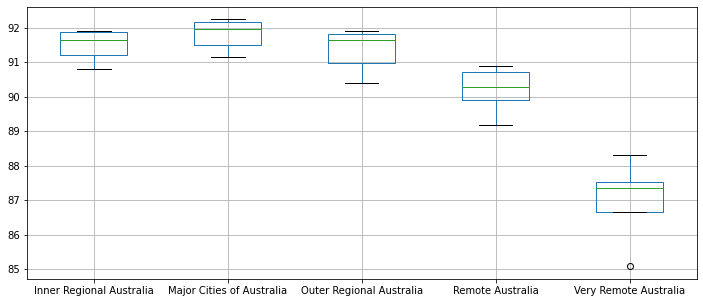

In [6]:
# make the box plots and write them out 
df5=df4.drop(['Attendance Year'],axis=1)
df5.boxplot(figsize=(12,5))
plt.savefig('../data/fig1_part1.png')